# Mercedes-Benz Greener Manufacturing

In [1]:
# Problem Statement:
# To reduce the time that cars spend on the test bench at Mercedes Benz

In [2]:
!pip install xgboost

In [3]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score

In [4]:
# Import Train and Test datasets

df_train = pd.read_csv('E:/Xzane/Priyesh/Courses - Training materials/Simplilearn/Machine Learning/Projects/Mercedes Benz Datasets/train.csv')
df_test = pd.read_csv('E:/Xzane/Priyesh/Courses - Training materials/Simplilearn/Machine Learning/Projects/Mercedes Benz Datasets/test.csv')


In [5]:
# Dimension of both the datasets
df_train.shape
df_test.shape

(4209, 377)

In [6]:
# Preview on both the Datasets
df_train.head(10)
#df_test.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# To verify uniqueness of rows
unique_train_rows = len(np.unique(df_train['ID']))
shp_train = df_train.shape
if shp_train[0] == unique_train_rows:
    print(True)

True


In [8]:
# Check the statistics useing "describe()" and datatypes "info()"
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [12]:
id_test = df_test['ID'].values

In [13]:
# drop "ID" columns from both the Datasets
df_train.drop(columns="ID",inplace=True)

In [14]:
df_train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test.drop(columns="ID",inplace=True)

In [16]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
# Exploratory Data Analysis

In [18]:
# lets Check for NULL/NA values IF present
print(f'No of Null Value Columns in the dataset: {np.count_nonzero(df_train.isnull())}')

No of Null Value Columns in the dataset: 0


In [19]:
# let's check values in 'y'
y_train = df_train['y'].values
print(f'Minimum {min(y_train)} \nMaximum: {max(y_train)} \nMean: {y_train.mean()} \nStandard deviation: {y_train.std()}')

Minimum 72.11 
Maximum: 265.32 
Mean: 100.66931812782134 
Standard deviation: 12.6778749695168


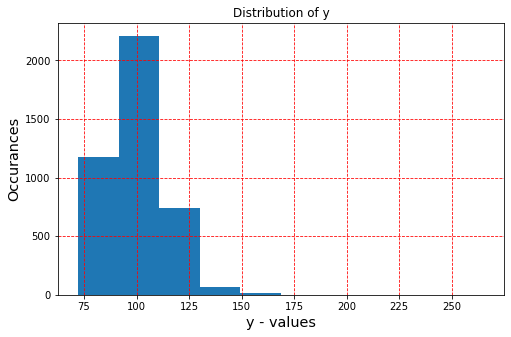

In [20]:
# Distribution of 'y' dependent variable by plotting
#type(df_train['y'])
plt.figure(figsize=(8,5))
plt.title("Distribution of y")
plt.ylabel("Occurances",fontsize='x-large')
plt.xlabel("y - values",fontsize='x-large')
plt.grid(color='red',linestyle='dashed')
plt.hist(df_train['y'],bins=10)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1905661a6c8>,
 'caps': [<matplotlib.lines.Line2D at 0x19056631ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1905662e5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x19056634808>],
 'fliers': [<matplotlib.lines.Line2D at 0x19056639908>],
 'means': [<matplotlib.lines.Line2D at 0x1905662e988>]}

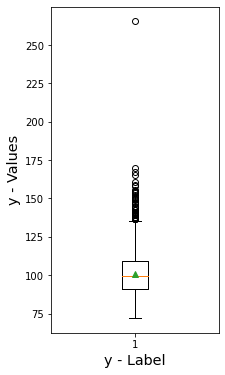

In [21]:
# Let us check for the outliers using box-plot
plt.figure(figsize=(3,6))
plt.ylabel("y - Values",fontsize='x-large')
plt.xlabel("y - Label",fontsize='x-large')
plt.boxplot(df_train['y'],showmeans=True)
# from this it can be observed that thare is only one outlier value(265)


Text(0.5, 1.0, 'Seeking for seasonality for First 100 rows')

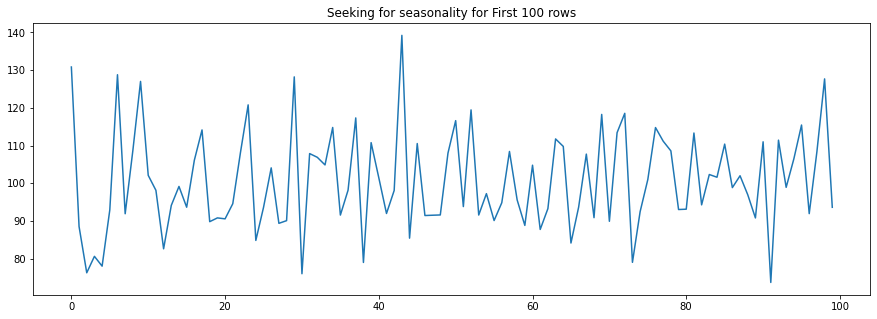

In [22]:
# Since the topic is related to time, let's check whether it is time-dependent or not
# If time- dependent, then check for trend, seasonality,cyclicity,error
plt.figure(figsize=(15,5))
plt.plot(df_train['y'][:100])
plt.title("Seeking for seasonality for First 100 rows")
# No seasonality is observed

In [23]:
# Feature Engineering:
# fetching features starting X,i.e., Leaving 'y'
train_columns = [cols for cols in df_train.columns if 'X' in cols]
test_columns = [cols for cols in df_test.columns if 'X' in cols]

print(f'\nNo of Features in Train Data: {len(train_columns)}')
print(f'\nFeatures Datatypes in Train Dataset:\n {df_train[train_columns].dtypes.value_counts()}')

print(f'\nNo of Features in Train Data: {len(train_columns)}')
print(f'\nFeatures datatypes in Test Dataset:\n {df_test[test_columns].dtypes.value_counts()}')



No of Features in Train Data: 376

Features Datatypes in Train Dataset:
 int64     368
object      8
dtype: int64

No of Features in Train Data: 376

Features datatypes in Test Dataset:
 int64     368
object      8
dtype: int64


In [24]:
# Now differentiating the datatypes in as list of arrays,
# Also called as "Finding the Cardinality of Features"

cardinality_trainColumns_Same_dtypes = [[],[],[]]

for columns in train_columns:
    type_col = df_train[columns].dtype
    len_unique_cols_values = len(np.unique(df_train[columns]))

    if len_unique_cols_values == 1:
        cardinality_trainColumns_Same_dtypes[0].append(columns)
    elif len_unique_cols_values ==2 and type_col == np.int64:
        cardinality_trainColumns_Same_dtypes[1].append(columns)
    else:
        cardinality_trainColumns_Same_dtypes[2].append(columns)


print(f'''\n No of Constant "0" value Variables/ Constant Features: {len(cardinality_trainColumns_Same_dtypes[0])}
\n No of Binary "0 & 1" values Variables/ Binary Features: {len(cardinality_trainColumns_Same_dtypes[1])}
\n No of  Categorical Variables/ Categorical Features: {len(cardinality_trainColumns_Same_dtypes[2])}''')


 No of Constant "0" value Variables/ Constant Features: 12

 No of Binary "0 & 1" values Variables/ Binary Features: 356

 No of  Categorical Variables/ Categorical Features: 8


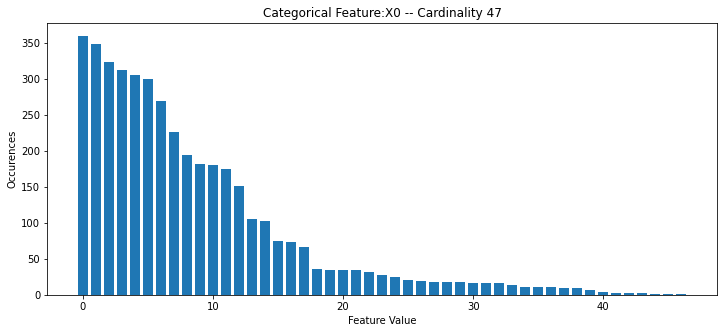

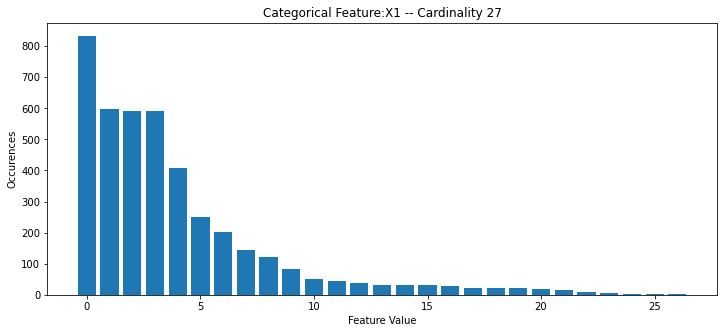

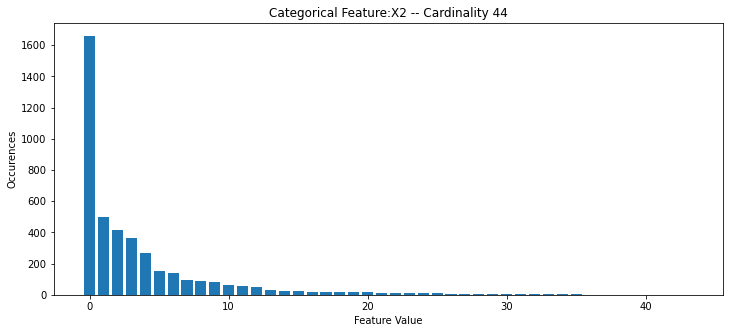

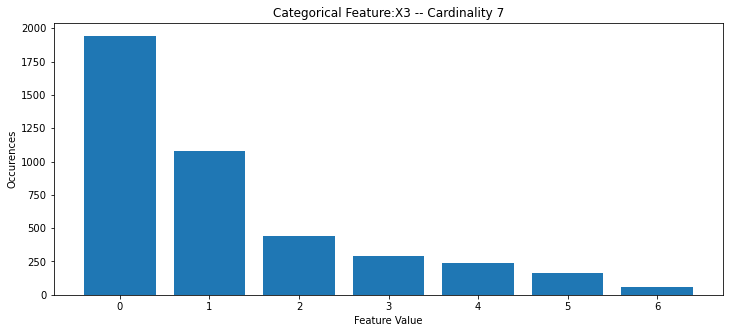

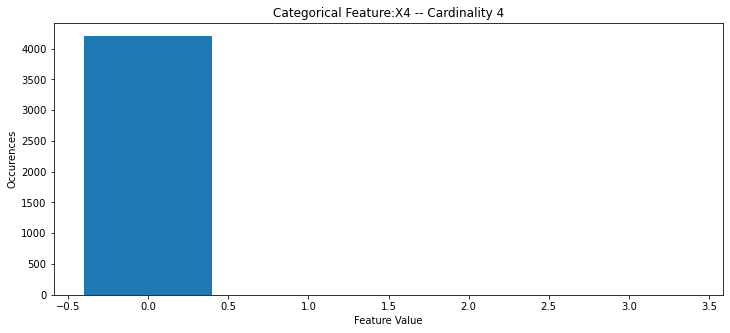

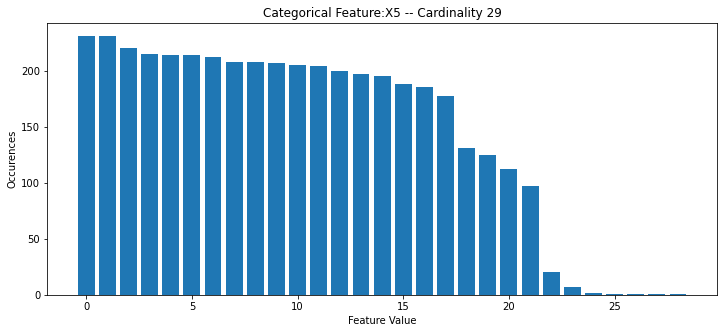

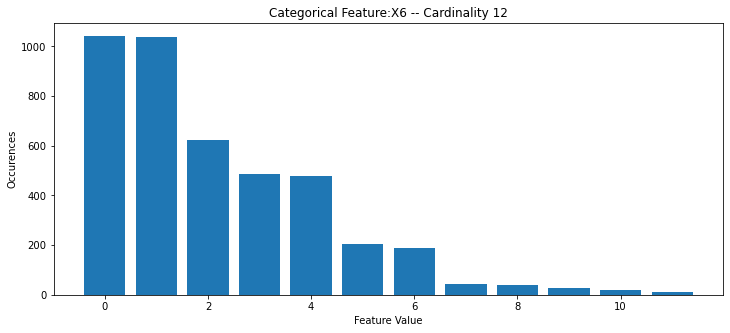

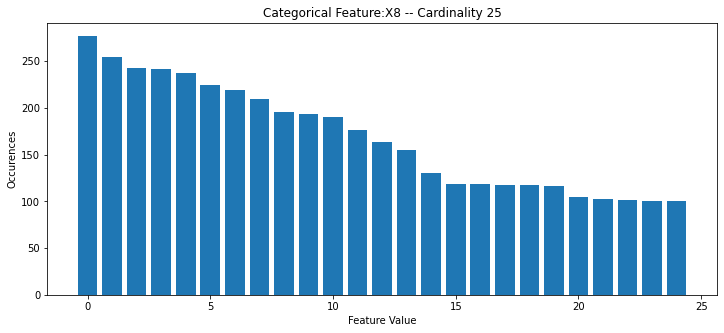

In [25]:
# Checking the cardinality of the Categorical values
# Below is the checking code:
'''cardinality_categorical_feature = len(df_train[cardinality_trainColumns_Same_dtypes[2]]['X2'].value_counts())
categorical_column = df_train[cardinality_trainColumns_Same_dtypes[2]]['X2'].value_counts().sort_index()
df_train[cardinality_trainColumns_Same_dtypes[2]]['X2'].value_counts().values
cardinality_categorical_feature
categorical_column'''

for columns in cardinality_trainColumns_Same_dtypes[2]:
    value_counts_columns=df_train[columns].value_counts()    
    fig, ax = plt.subplots(figsize=(12,5))
    plt.bar(range(len(value_counts_columns)),value_counts_columns.values)
    plt.xlabel('Feature Value')
    plt.ylabel('Occurences')
    plt.title(f'Categorical Feature:{columns} -- Cardinality {len(np.unique(df_train[columns]))}')

In [26]:
# Now, Let's drop the Zero Variance columns/ constant Features:

zero_variance_columns = cardinality_trainColumns_Same_dtypes[0]
zero_variance_columns
#Another way to get/calculate Zero Variance columns:
'''zero_variance_columns = df_train.var()[df_train.var()==0].index.values #array'''
'''zero_variance_columns = [col for col in df_train.var()[df_train.var()==0].index] # list'''

df_train.drop(zero_variance_columns,inplace=True,axis=1)
df_test.drop(zero_variance_columns,inplace=True,axis=1)

In [27]:
# Now using labelEncoder on Object Feature/Categorical Feature
encoder = LabelEncoder()

Categorical_Features = cardinality_trainColumns_Same_dtypes[2]
for cols in Categorical_Features:
    df_train[cols] = encoder.fit_transform(df_train[cols])
    df_test[cols] = encoder.fit_transform(df_test[cols])
    #df_encoded_train[cols] = df_train[cols].apply(encoder.fit_transform)
    
df_train.head()



,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:

# Another way to get the object columns:
'''df_train.describe(include=('object'))
objectColumns = df_train.describe(include=('object')).columns.values '''


"df_train.describe(include=('object'))\nobjectColumns = df_train.describe(include=('object')).columns.values "

In [34]:
#----- Here ends Data Preprocessing
# Perform Dimentionality Reduction using PCA with 98% of information retention
# and to hold the extracted features with highest variance

pcamodel = PCA(0.98,svd_solver='full')



In [35]:
X = df_train.drop('y',axis=1)

In [36]:
y = df_train['y']

In [37]:
pcamodel.fit(X)
#X.shape

PCA(n_components=0.98, svd_solver='full')

In [38]:
#sns.heatmap((pcamodel.get_covariance()))
pcamodel.n_components_ # this will give the no of features out of 364 hold 98% of information

14

In [39]:
pcamodel.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604, 0.0074454 , 0.00433701, 0.00294021, 0.00241796,
       0.00236488, 0.00203229, 0.00167204, 0.00148111])

In [40]:
#Split the data into train and test
X_train,X_val,Y_train,Y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
compact_derived_features_train = pd.DataFrame(pcamodel.transform(X_train))

In [42]:
compact_derived_features_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.702275,-0.819152,1.764693,15.064493,10.454413,-3.293719,2.255240,-1.381284,-1.640559,-0.797102,-0.647486,0.265320,-1.025048,0.251560
1,-3.100672,-0.252953,-1.537217,13.958218,5.651828,0.686510,0.332781,-0.911403,-0.805733,1.302379,0.260238,1.258430,-1.165082,1.896033
2,5.044271,14.693691,4.794393,-14.043006,-6.117229,-0.589902,0.751632,0.708491,-2.098176,-2.529490,-0.633301,-0.954919,0.286007,0.667560
3,-0.848695,10.468642,-6.189281,-8.476210,-6.203307,-0.660325,-0.253759,0.546069,-1.183831,2.561084,-0.723543,0.765636,1.231246,-1.966821
4,9.500301,-3.516963,-10.907147,2.547292,-0.923987,-4.639532,1.424913,-0.714109,3.294511,0.726886,-0.791136,-0.127605,-0.456767,0.085775


In [43]:
compact_derived_features_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,-0.033240,-0.197852,0.005932,-0.071544,-0.064515,0.015421,-0.007106,-0.005983,0.000750,0.010028,0.000271,-0.002140,0.000395,-0.004424
std,14.263326,10.599765,8.464366,7.933253,7.040619,2.896251,1.993652,1.527348,1.262193,1.142579,1.123743,1.029313,0.939477,0.886185
min,-21.899802,-21.151050,-20.048229,-20.802751,-13.745017,-5.036026,-4.381197,-3.288619,-3.199759,-2.866485,-3.054352,-2.267402,-2.818153,-3.037567
25%,-11.827716,-7.337372,-6.681494,-5.914770,-5.851388,-2.131484,-1.942388,-1.505519,-0.994826,-0.639014,-0.778877,-0.619578,-0.592823,-0.595470
50%,-3.838910,-2.602931,-0.189175,-0.369078,-0.658366,-0.206804,0.412506,0.403643,-0.021264,-0.048369,-0.046605,-0.097367,-0.068066,0.002503
75%,11.588808,5.303114,6.146733,5.326945,5.928378,1.243352,1.494772,1.181139,0.808561,0.537060,0.735884,0.448439,0.647132,0.564038
max,34.764631,30.136712,21.277634,21.810742,14.501954,7.530676,4.685448,3.446870,3.608305,5.047816,3.525782,4.434044,3.965749,3.153785


In [44]:
compact_derived_features_X_val = pd.DataFrame(pcamodel.transform(X_val))

In [45]:
compact_derived_features_test = pd.DataFrame(pcamodel.transform(df_test))

In [46]:
compact_derived_features_X_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,17.841395,-15.245960,-6.299416,4.391821,-0.724654,-2.742346,-2.120028,2.943792,1.287411,-0.030686,2.001232,-1.150132,-0.700802,0.502460
1,-0.990921,-15.208289,1.040124,2.620286,9.256619,-1.371609,-1.857634,1.885172,-1.389321,-0.235359,-1.169911,-1.613507,1.125245,-0.012022
2,-2.894524,3.927628,-1.575664,-10.600740,3.257902,-3.705331,-0.045750,-0.292077,-1.071945,0.334843,0.750981,0.627861,1.177258,-1.792052
3,13.849039,1.874404,6.003682,8.912134,-0.749994,-2.604863,1.145621,1.266291,0.819209,-0.629472,-0.526549,4.061894,-0.286990,-0.148547
4,20.639205,-15.373246,6.846871,3.755760,4.645073,-1.805657,0.259409,0.663802,-0.080865,-0.183061,0.120290,-1.590133,0.683242,0.217028


In [47]:
compact_derived_features_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,15.122597,12.426344,16.575688,0.381591,10.749272,6.778299,-1.966062,2.278460,1.213109,-0.875308,-1.659406,3.631911,-0.754093,-0.411399
1,-16.418523,-6.087805,-5.818108,-0.643844,11.846740,0.972063,3.852835,1.901458,-0.534424,0.856518,0.115282,-0.170789,-1.886254,0.691332
2,11.310890,-2.240987,-5.683210,15.249597,-2.777294,-2.557530,-1.093927,0.439790,0.321815,-0.115722,-0.926723,3.312713,-1.398871,-0.915639
3,12.883278,13.284800,14.409574,-11.039926,2.535217,-3.919070,-2.910159,2.015376,-0.229717,-1.443821,-1.820858,3.921842,-0.290971,-0.317794
4,-12.119759,3.021287,20.739083,0.602495,-1.087117,-1.422969,0.863914,-3.129012,-1.467315,0.091997,0.324546,0.215057,-0.147667,0.209318


In [48]:
# Now applying XGBoost
d_train = xgb.DMatrix(compact_derived_features_train,label=Y_train)
d_valid = xgb.DMatrix(compact_derived_features_X_val,label=Y_val)
d_test = xgb.DMatrix(compact_derived_features_test)

In [49]:
params={}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

In [50]:
def xgb_r2_score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

In [51]:
watchlist = [(d_train, 'train'),(d_valid, 'valid')]

In [68]:
clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2_score,maximize=True,verbose_eval=10)

[11:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99655	valid-rmse:98.88612	train-r2:-59.49685	valid-r2:-61.82345
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.13854	valid-rmse:81.05356	train-r2:-39.63937	valid-r2:-41.20805
[20]	train-rmse:66.58674	valid-rmse:66.53808	train-r2:-26.36957	valid-r2:-27.44406
[30]	train-rmse:54.73951	valid-rmse:54.73520	train-r2:-17.49670	valid-r2:-18.24796
[40]	train-rmse:45.11494	valid-rmse:45.14030	train-r2:-11.56415	valid-r2:-12.09121
[50]	train-rmse:37.31625	valid-rmse:37.36517	train-r2:-7.59584	valid-r2:-7.96985
[60]	train-rmse:31.02009	valid-rmse:31.09342	train-r2:-4.93989	valid-r2:-5.21138
[70]	train-rmse:25.95622	valid-rmse:26.05817	train-r2:-3.15887	valid-r2:-3.36253
[80]	train-rmse:21.90220	

In [53]:
p_test = clf.predict(d_test)
pred = pd.DataFrame()
pred['ID'] = id_test
pred['y'] = p_test

In [56]:
# Predicted price for each IDs
pred.head()

,ID,y
0,1,75.972214
1,2,96.070007
2,3,83.217262
3,4,75.646362
4,5,108.606735
